## Math 425 Computation Linear Algebra
#### Quiz, Week of April 3rd

Brent A. Thorne brentathorne@gmail.com

In [1]:
# environment setup, try to make it clear which library I'm using for what
import numpy as np  # nice arrays and other stuff
import sympy as sym # symbollic maths 
from sympy.matrices import Matrix # pretty matrices
from sympy import Eq # pretty equations
from sympy.physics.quantum.dagger import Dagger # we'll want this later...
from math import e, pi, sqrt # Mathy math math
from mpl_toolkits.mplot3d import Axes3D # we like 3d quivers for tutorials
import matplotlib.pyplot as plt # old standby for plotting like a villian
from IPython.display import display, Math, Latex # used to display formatted results in the console
sym.init_printing()  # initialize pretty printing

In [2]:
#P1
u = Matrix([sym.symbols('u1 u2 u3')]).T
v = Matrix([3,4,0]).T
u,v, (v/sym.sqrt(v.dot(v))).n()

⎛⎡u₁⎤                          ⎞
⎜⎢  ⎥                          ⎟
⎜⎢u₂⎥, [3  4  0], [0.6  0.8  0]⎟
⎜⎢  ⎥                          ⎟
⎝⎣u₃⎦                          ⎠

In [3]:
#P2
a1 = Matrix([3,2,-5,0])
a2 = Matrix([-4,1,-2,6])
a1, a2, a1.dot(a2)

b1 = Matrix([8,-5])
b2 = Matrix([-2,-2])
b1, b2, b1.dot(b2)

c1 = Matrix([-3,7,4,0])
c2 = Matrix([1,-8,15,-7])
c1, c2, c1.dot(c2)

d1 = Matrix([12,3,-5])
d2 = Matrix([2,-3,3])
d1, d2, d1.dot(d2)

⎛⎡12⎤  ⎡2 ⎤   ⎞
⎜⎢  ⎥  ⎢  ⎥   ⎟
⎜⎢3 ⎥, ⎢-3⎥, 0⎟
⎜⎢  ⎥  ⎢  ⎥   ⎟
⎝⎣-5⎦  ⎣3 ⎦   ⎠

In [4]:
#P3
y = Matrix([2,3])
u = Matrix([4,-7])
display(Latex('Write $y$ as the sum of two orthogonal vectors, such that $y=\hat{y}+z$.'))

y_hat = (y.dot(u)/(u.dot(u)))*u
z = y - y_hat

#y, y_hat, z, y_hat+z, y_hat.dot(z)
y_hat.n(), z.n()

<IPython.core.display.Latex object>

⎛⎡-0.8⎤  ⎡2.8⎤⎞
⎜⎢    ⎥, ⎢   ⎥⎟
⎝⎣1.4 ⎦  ⎣1.6⎦⎠

In [5]:
#P4
y = Matrix([6,3,-2])
u1 = Matrix([3,4,0])
u2 = Matrix([-4,3,0])
display(Latex('Find the orthogonal projection of y onto Span {u1, u2}.'))

W = u1.row_join(u2)
W.rref() # yes, Span{u1,u2} is an orthogonal basis for W

y_hat = (y.dot(u1)/u1.dot(u1))*u1 + (y.dot(u2)/u2.dot(u2))*u2
z = y-y_hat
display(Latex(f'$y={sym.latex(y)}={sym.latex(y_hat)}+{sym.latex(y-y_hat)}$'))
#W,y, W.norm()
#W.columnspace()
y_hat, z, y_hat+z, y, y_hat.dot(z)
y,u1,u2

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

⎛⎡6 ⎤  ⎡3⎤  ⎡-4⎤⎞
⎜⎢  ⎥  ⎢ ⎥  ⎢  ⎥⎟
⎜⎢3 ⎥, ⎢4⎥, ⎢3 ⎥⎟
⎜⎢  ⎥  ⎢ ⎥  ⎢  ⎥⎟
⎝⎣-2⎦  ⎣0⎦  ⎣0 ⎦⎠

In [6]:
#P5
y = Matrix([1,7])
u = Matrix([-4,2])
y,u  
y_hat = (y.dot(u)/u.dot(u)) * u
z = y - y_hat
y_hat, y, y_hat.dot(z)

⎛⎡-2⎤  ⎡1⎤   ⎞
⎜⎢  ⎥, ⎢ ⎥, 0⎟
⎝⎣1 ⎦  ⎣7⎦   ⎠

In [7]:
#P6
y = Matrix([3,-1,1,13])
u1 = Matrix([1,-2,-1,2])
u2 = Matrix([-4,1,0,3])

W = u1.row_join(u2)
W.rref() # yes, Span{u1,u2} is an orthogonal basis for W

y_hat = (y.dot(u1)/u1.dot(u1))*u1 + (y.dot(u2)/u2.dot(u2))*u2
z = y-y_hat
display(Latex(f'$y={sym.latex(y)}={sym.latex(y_hat)}+{sym.latex(y-y_hat)}$'))
#W,y, W.norm()
#W.columnspace()
y_hat, z, y_hat+z, y, y_hat.dot(z)

z, z.norm(), sym.sqrt(z.dot(z))

<IPython.core.display.Latex object>

⎛⎡4⎤      ⎞
⎜⎢ ⎥      ⎟
⎜⎢4⎥      ⎟
⎜⎢ ⎥, 8, 8⎟
⎜⎢4⎥      ⎟
⎜⎢ ⎥      ⎟
⎝⎣4⎦      ⎠

### Appendix. Least-squares
Let $A$ be an $m$x$n$ matrix.  The following statements are logically equivalent:

a. The equation $Ax=b$ has a unique least-squares solution for each $b$ in $\mathbb{R^m}$.

b. The columns of $A$ are linearly independent.

c. The matrix $A^TA$ is invertible.
When these statement are ture, the least-squares solution $\hat{x}$ is given by

#### $\hat{x}=(A^TA)^{-1}A^Tb$

In [8]:
A = Matrix([[2,3],[2,4],[1,1]])
b = Matrix([7,3,1])
Au = A.row_join(b)
Au, Au.rref()

display(Latex(f'b_hat=${sym.latex(A.T*b)}$'))

display(Latex('Solve $A\hat{x}=b$' + f', ${sym.latex((A.T*A).inv()*A.T*b)}$'))

display(Math('\hat{x}'))
display(Latex('$\hat{x}$'+'moo'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

In [9]:
A = Matrix([[2,3],[2,4],[1,1]])
b = Matrix([7,3,1])
x_hat= (A.T*A).inv()*A.T*b
A*x_hat

u1 = A.col(0)
u2 = A.col(1)

v1 = u1
v2 = u2 - (u2.dot(v1)/v1.dot(v1))*v1

v1 = v1/sym.sqrt(v1.dot(v1))
v2 = v2/sym.sqrt(v2.dot(v2))
v1,v2, v1.dot(v1),v2.dot(v2), v1.dot(v2)

U = Matrix([v1.T,v2.T]).T
b_hat = (b.dot(v1)/v1.dot(v1))*v1 + (b.dot(v2)/v2.dot(v2))*v2
z = b - b_hat 
z, b_hat
A.row_join(b_hat).rref(), 

(A.T*A).row_join(A.T*b).rref()

⎛⎡1  0  4 ⎤        ⎞
⎜⎢        ⎥, (0, 1)⎟
⎝⎣0  1  -1⎦        ⎠

In [10]:
#P8
u1 = Matrix([1,1,-2])
u2 = Matrix([5,-1,2])
u3 = Matrix([0,0,1])

v1 = u1
v2 = u2 - (u2.dot(v1)/v1.dot(v1))*v1

v1, v2

u1*u3.dot(u1)/u1.dot(u1) + u2*u3.dot(u2)/u2.dot(u2)

⎡ 0  ⎤
⎢    ⎥
⎢-2/5⎥
⎢    ⎥
⎣4/5 ⎦

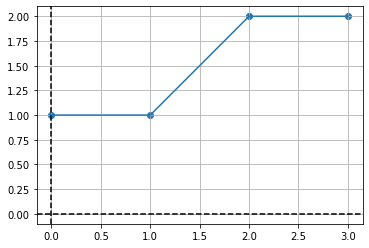

In [21]:
M = Matrix([[0,1],[1,1],[2,2],[3,2]]).T
M
plt.scatter(M.row(0), M.row(1))
plt.plot(list(M.row(0)), list(M.row(1)))
plt.grid(); plt.gca().set_aspect("equal") # square grids are pretty
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')